# Linear Regression Project Tutorial

In [1]:
import pandas as pd
#Opening the dataset
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#Getting the dimensions of the dataset
print(total_data.shape)

(1338, 7)


The dataset contains 1338 rows and 7 colums ("charges" is the target and the other six are the features).


In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset is divided into 3 categorial and 4 numerical variables:
- numerical: age, bmi, children, charges
- categorial: sex, smoker, region

In [4]:
#Checking for null values
print(total_data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
#Looking for duplicates
duplicates = total_data[total_data.duplicated()]
print(duplicates)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [6]:
#Removing duplicates
total_data = total_data.drop_duplicates().reset_index(drop = True)
print(total_data.shape)

(1337, 7)


One duplicate has been removed.

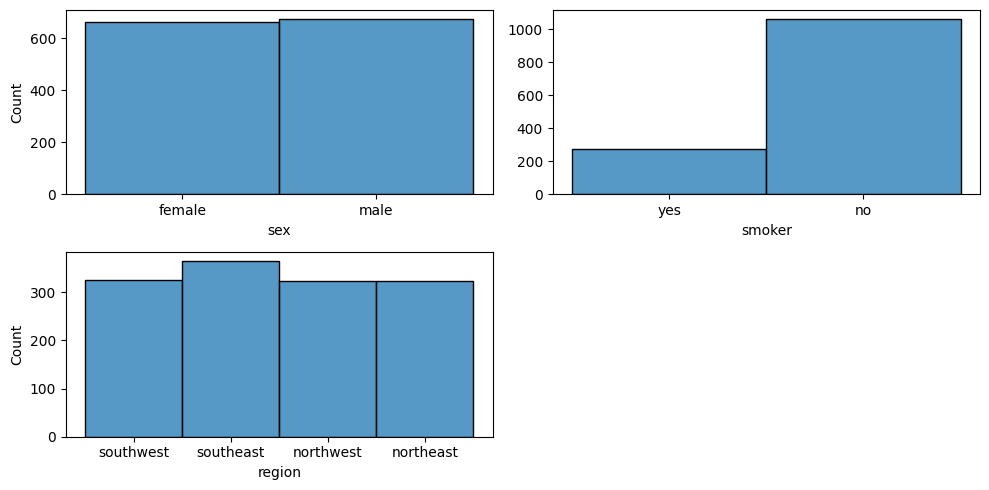

In [7]:

#Analysis of univariate variables

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10,5))

sns.histplot(total_data, x = "sex", ax = axis[0, 0])
sns.histplot(total_data, x = "smoker", ax = axis[0, 1]).set(ylabel = None)
sns.histplot(total_data, x = "region", ax = axis[1, 0])

fig.delaxes(axis[1,1])

plt.tight_layout()

plt.show()

From the graphs, we can conclude that:
- there is a minimal difference between male and female 
- there is also a minimal difference if we take into account the region (being the southeast the one with most people)
- there is a huge difference between smokers and non smokers, being the number of non smokers one almost five times higher than the number of smokers 


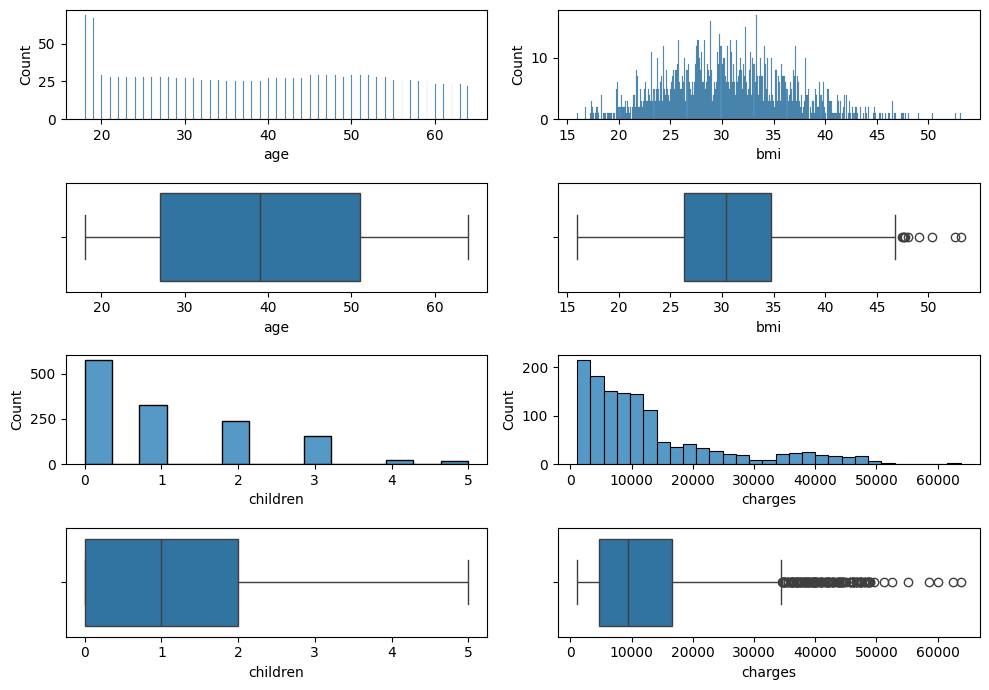

In [8]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7))

sns.histplot(total_data, x = "age", ax = axis[0, 0], binwidth=.1)
sns.boxplot(total_data, x = "age", ax = axis[1, 0])

sns.histplot(total_data, x = "bmi", ax = axis[0, 1], binwidth=.1)
sns.boxplot(total_data, x = "bmi", ax = axis[1, 1])

sns.histplot(total_data, x = "children", ax = axis[2, 0])
sns.boxplot(total_data, x = "children", ax = axis[3, 0])

sns.histplot(total_data, x = "charges", ax = axis[2, 1])
sns.boxplot(total_data, x = "charges", ax = axis[3, 1])

plt.tight_layout()

plt.show()

From the graphs we can conclude that:
- the variable "age" goes from 18 to almost 70, being "18" and "19" the most represented
- the variable "bmi" shows a quite symetrical representation: most values are between 25 and 35 and we can find some outliers over 47. 
- the variable "children" shows that most people in the dataset have 0, 1 or 2 children, whereas there is small quantity with 4 or 5. 
- the variable "charges" shows that price range concentrates mainly between 5000 and 18000USD, but there is an important amount of ouliers over 35000USD.


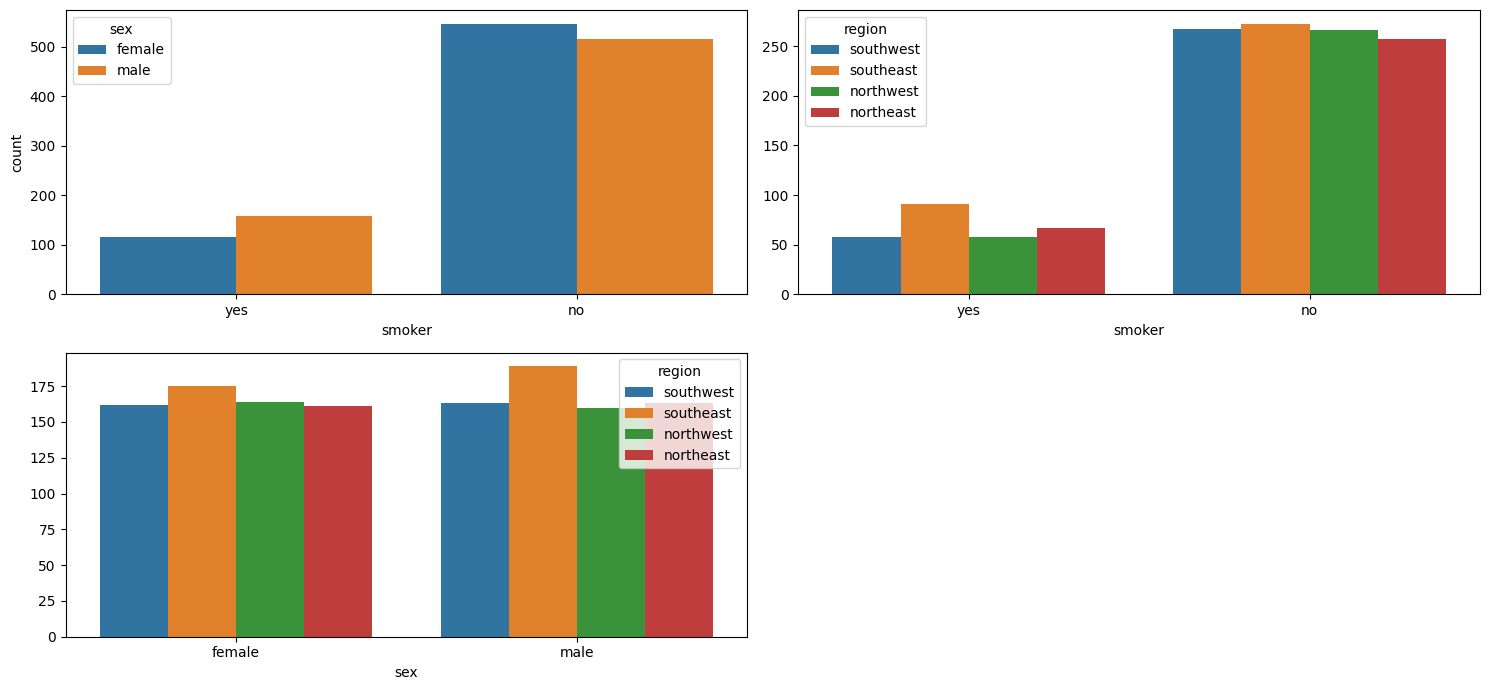

In [9]:
#Analysis of multivariate variable

#Categorical-categorical analysis

fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "smoker", hue = "sex")
sns.countplot(ax = axis[0, 1], data = total_data, x = "smoker", hue = "region").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x = "sex", hue = "region").set(ylabel = None)

plt.delaxes(ax=axis[1, 1])
plt.tight_layout()

plt.show()

The graphs above show that there is not a big difference when comparing categorial variables. 
- Southeast is the most represented region both in males and females and smokers and non smokers. 
- There are more female non smokers, whereas there are more male smokers. However, in both cases the difference is not relevant. 


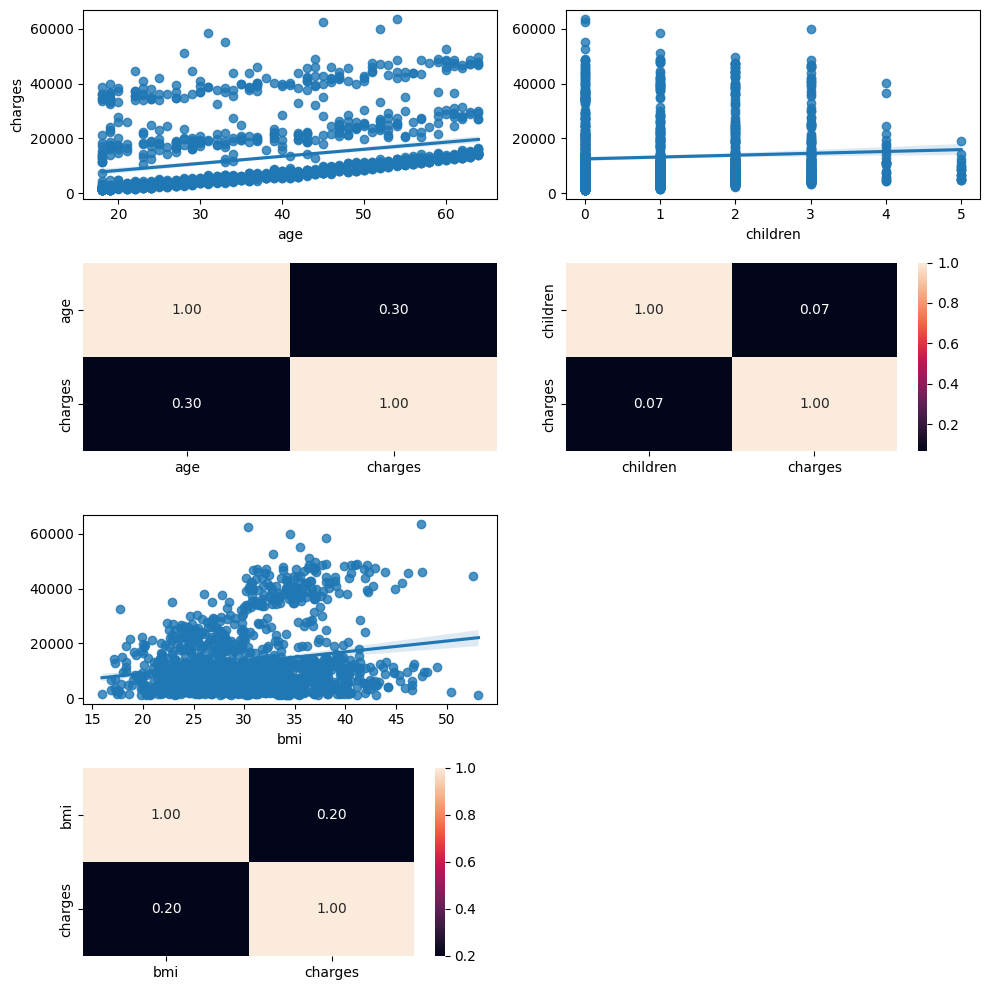

In [10]:
#Analysis of multivariate variable

#Numerical - numerical analysis

fig, axis = plt.subplots(4, 2, figsize = (10, 10))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = total_data, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

plt.delaxes(ax=axis[2,1]); plt.delaxes(ax=axis[3,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Based on the plots above we can conclude that the strongest predictor of charges amont "age", "children" and "BMI" seems to be age, followed by BMI, whereas the number of children has a weaker influence.

In [11]:
#Correlation analysis: Factorizing categorial values
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]

total_data.drop_duplicates(["sex", "sex_n"])[["sex", "sex_n"]].to_csv("/workspaces/machine-learning-linear-regression2/data/processed/sex_to_sexn.csv", index = False)
total_data.drop_duplicates(["smoker", "smoker_n"])[["smoker", "smoker_n"]].to_csv("/workspaces/machine-learning-linear-regression2/data/processed/smoker_to_smokern.csv", index = False)
total_data.drop_duplicates(["region", "region_n"])[["region", "region_n"]].to_csv("/workspaces/machine-learning-linear-regression2/data/processed/education_to_educationn.csv", index = False)
total_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


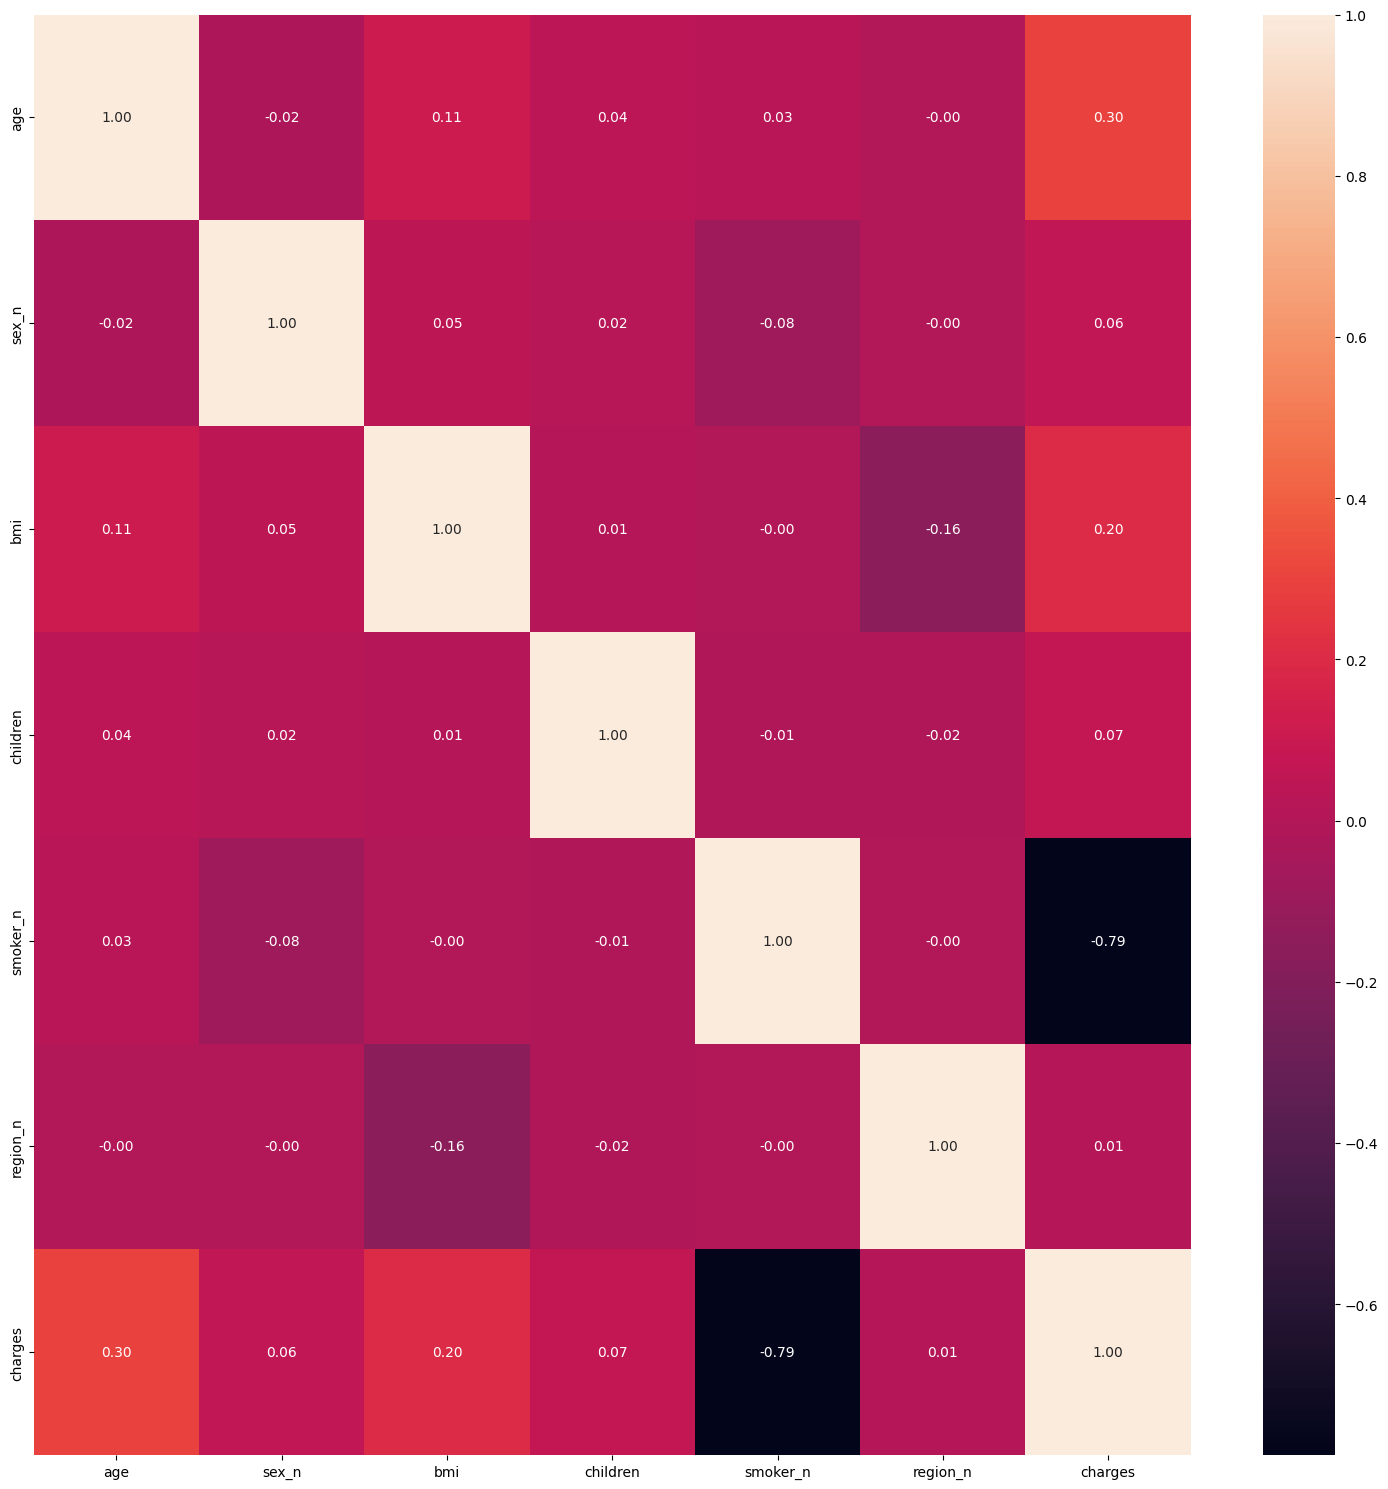

In [12]:
fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(total_data[["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

From the graph we can conclude that the "charges" variable is mostly correlated with 3 other variables:
- "age": the price rises with the age
- "bmi": the price rises with the bmi
- and the strongest correlation is with the "smoker" variable: prices are higher for smokers than for non smokers


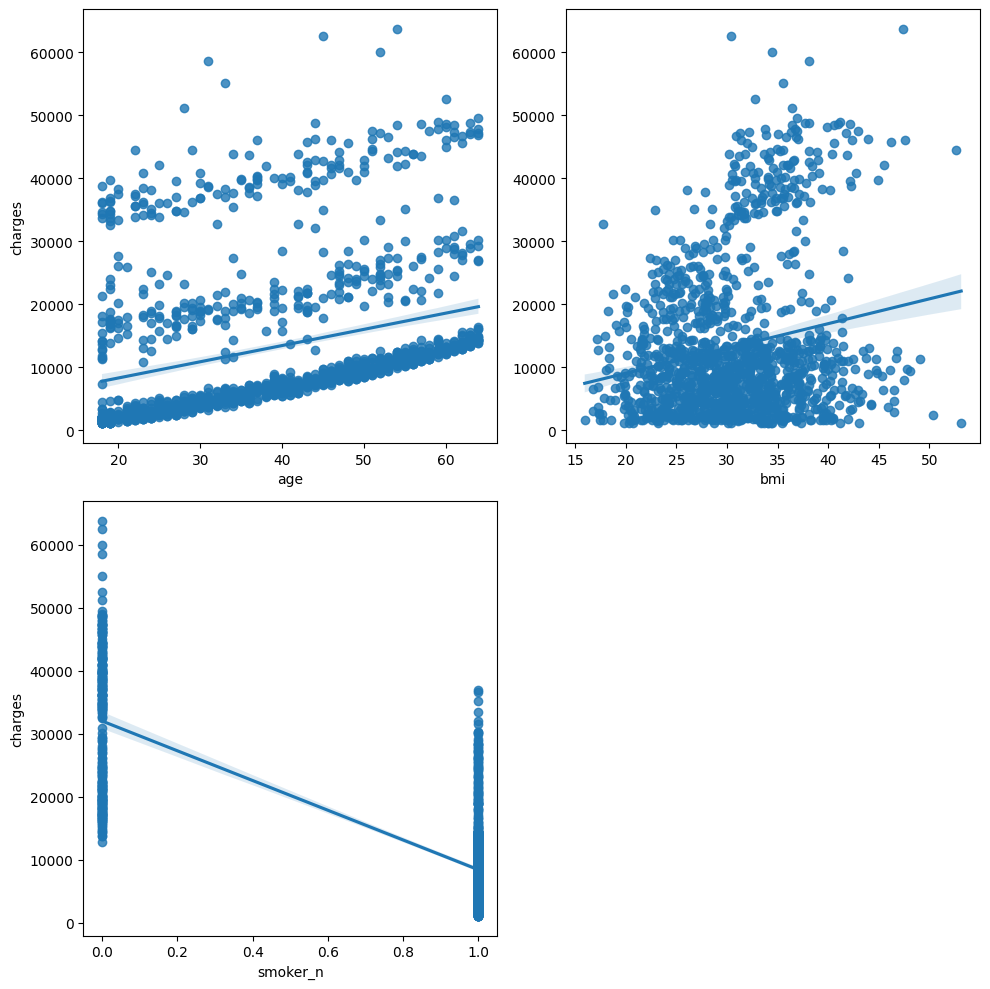

In [13]:
fig, axis = plt.subplots(2, 2, figsize = (10, 10))

sns.regplot(ax = axis[0,0], data = total_data, x = "age", y = "charges")
sns.regplot(ax = axis[0,1], data = total_data, x = "bmi", y = "charges").set(ylabel = None)
sns.regplot(ax = axis[1,0], data = total_data, x = "smoker_n", y = "charges")

plt.delaxes(ax=axis[1,1])

plt.tight_layout()

plt.show()

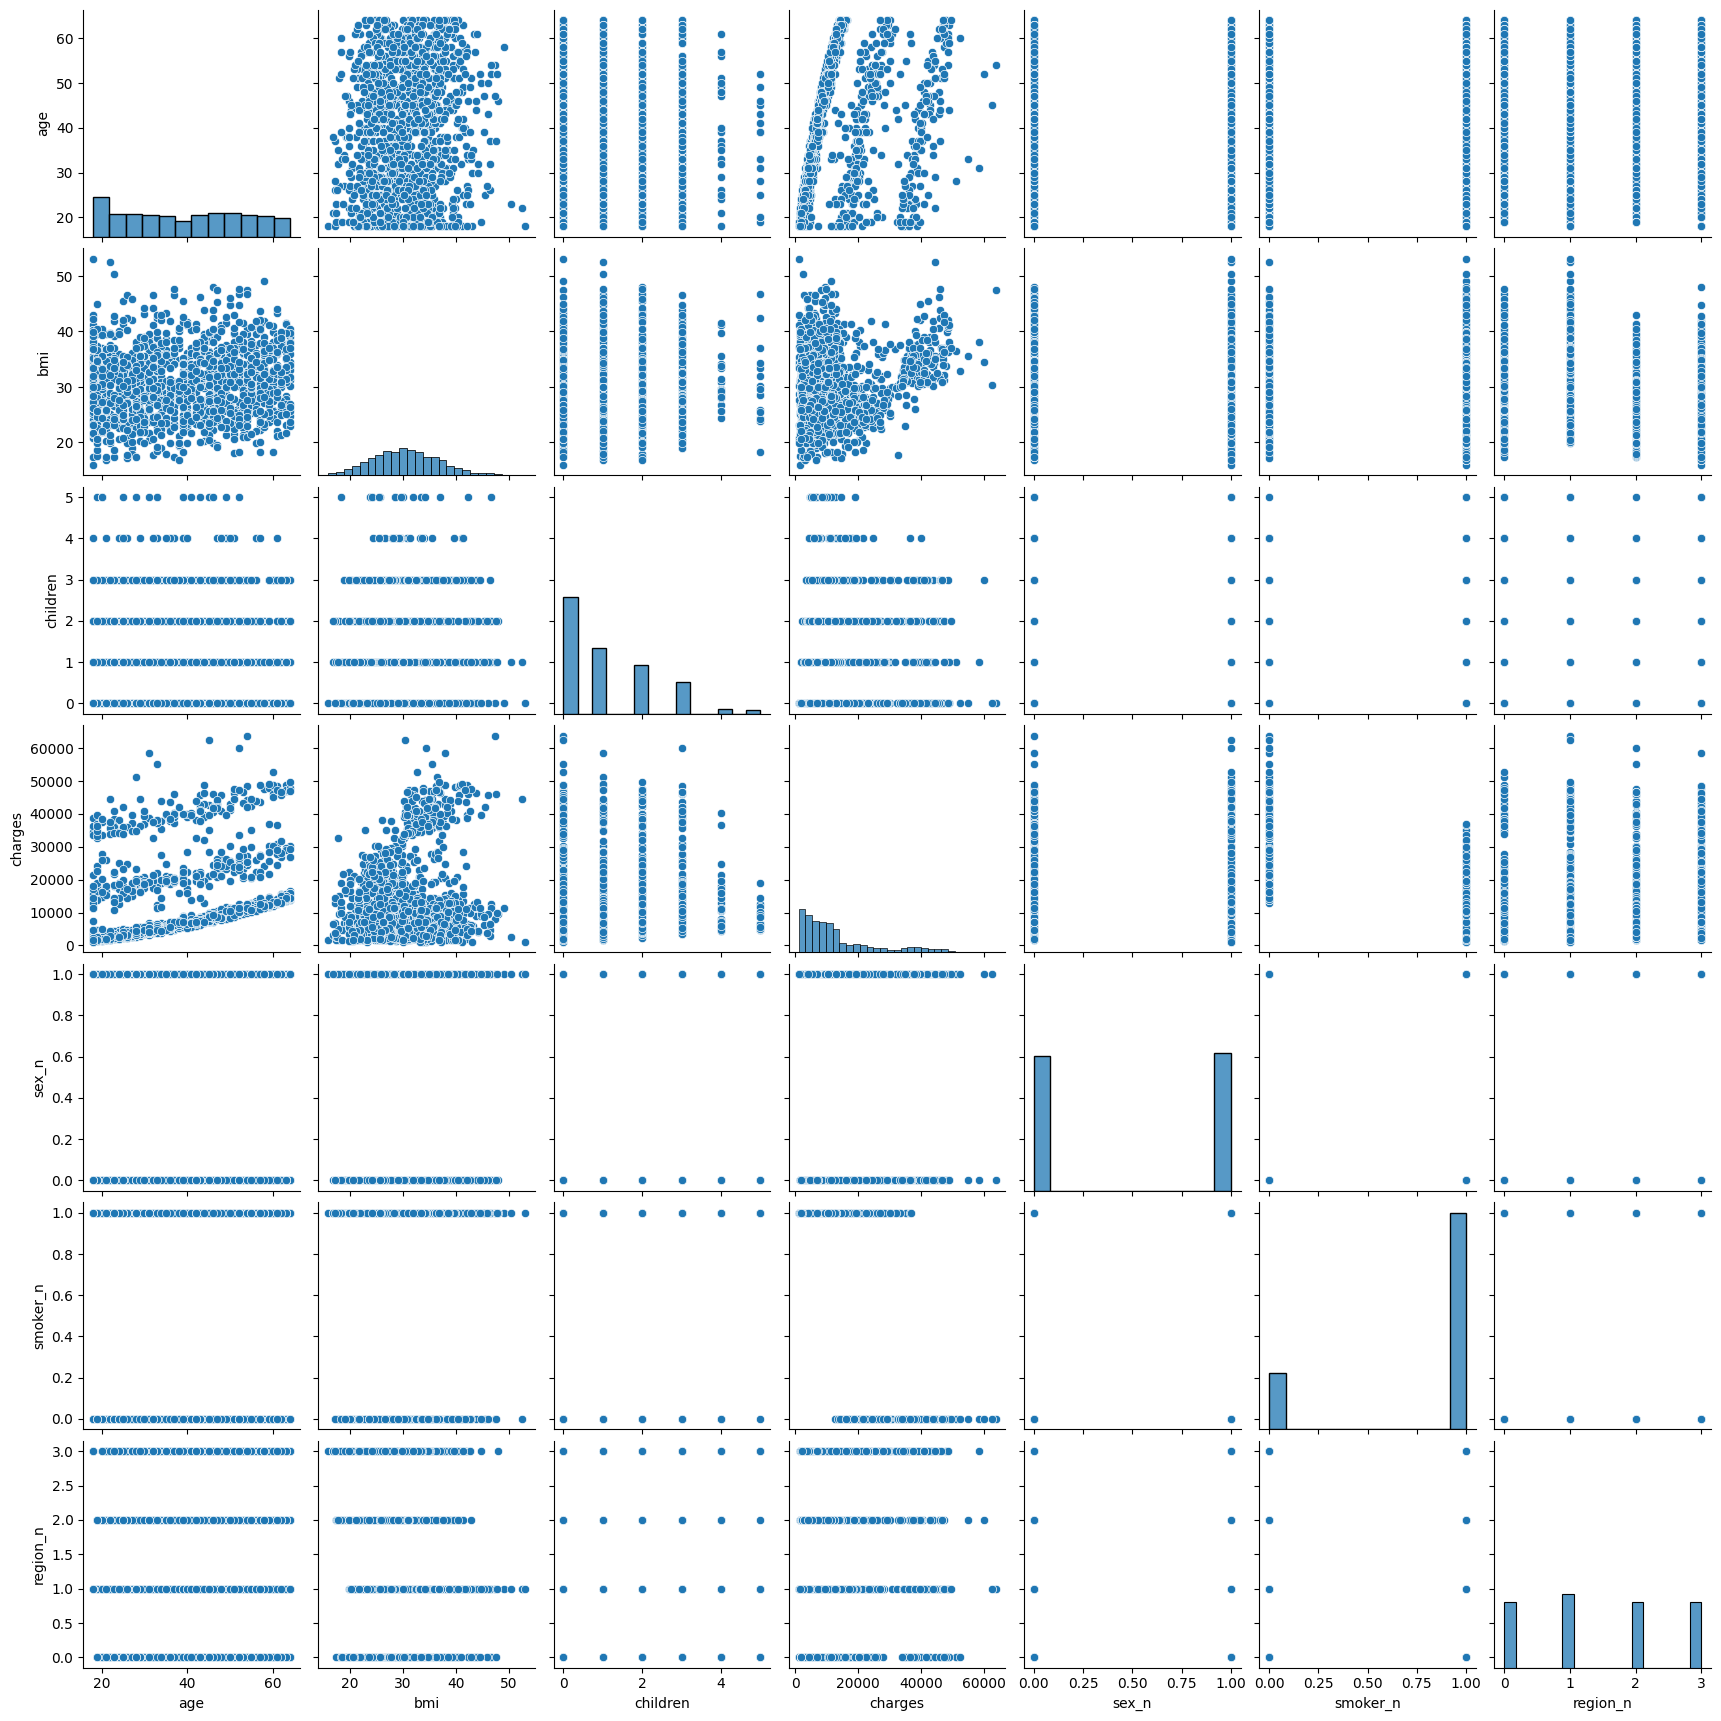

In [14]:
sns.pairplot(data = total_data)

In [15]:
#Outlier analysis
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


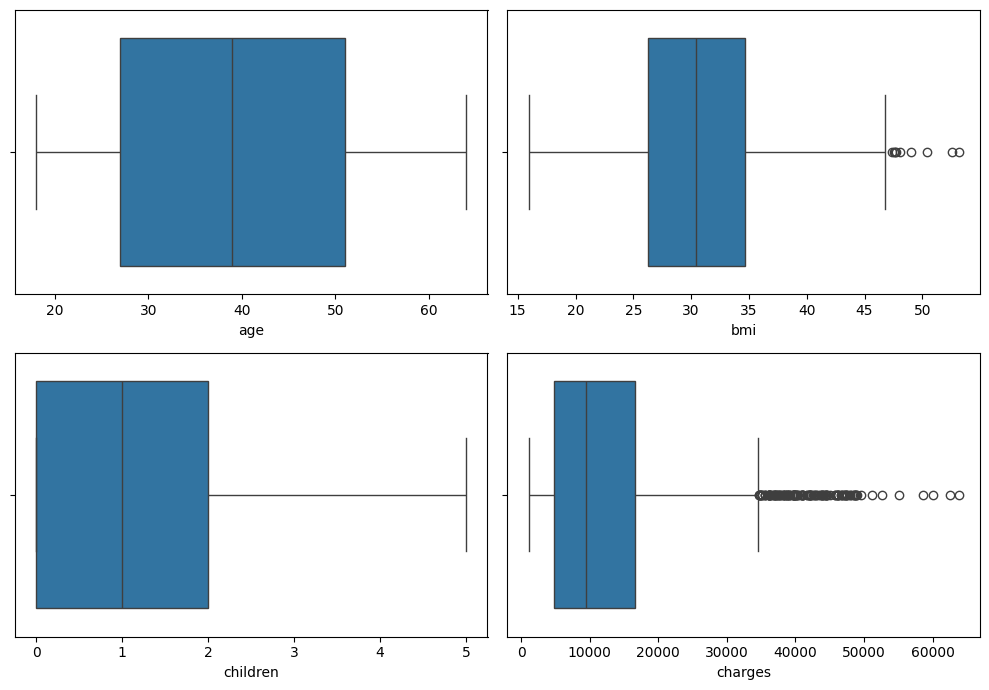

In [16]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.boxplot(total_data, x = "age", ax = axis[0, 0])
sns.boxplot(total_data, x = "bmi", ax = axis[0, 1])
sns.boxplot(total_data, x = "children", ax = axis[1, 0])
sns.boxplot(total_data, x = "charges", ax = axis[1, 1])

plt.tight_layout()

plt.show()

In [17]:
#Creating the variable for no outliers
total_data_no_outliers = total_data.copy()

In [18]:
bmi_stats = total_data["bmi"].describe()
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
bmi_upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
bmi_lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr
print(f"The upper and lower limits for finding outliers are {round(bmi_upper_limit, 2)} and {round(bmi_lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")


The upper and lower limits for finding outliers are 47.32 and 13.67, with an interquartile range of 8.41


In [19]:
mean_bmi = total_data["bmi"].mean()
#print (mean_bmi)

# Replacing outliers with the mean value
total_data_no_outliers['bmi'] = total_data_no_outliers['bmi'].apply(lambda x: mean_bmi if (x > 47.32 or x < 13.67) else x)
total_data_no_outliers.head()


,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


In [20]:
#Looking for null values
total_data.isnull().sum()
total_data_no_outliers.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [21]:
#Saving total data + total_data_no_outliers
total_data.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data.csv", index = False)
total_data_no_outliers.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers.csv", index = False)


In [22]:
from sklearn.model_selection import train_test_split

#Splitting total_data
predictoras = ['age', 'sex_n', 'bmi', 'children', 'smoker_n', 'region_n']
target = 'charges'

X = total_data[predictoras]
y = total_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

X_train

,age,sex_n,bmi,children,smoker_n,region_n
70,27,0,24.750,0,0,1
65,19,0,28.900,0,1,0
876,33,1,33.440,5,1,1
564,18,0,32.120,2,1,1
183,44,0,26.410,0,1,2
...,...,...,...,...,...,...
136,19,1,34.100,0,1,0
986,45,0,27.645,1,1,2
133,19,1,25.555,0,1,2
361,35,1,30.500,1,1,0


In [23]:
#Splitting total_data_no_outliers
X = total_data_no_outliers[predictoras]
y = total_data_no_outliers[target]

X_train_no_outliers, X_test_no_outliers, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

X_train_no_outliers


,age,sex_n,bmi,children,smoker_n,region_n
70,27,0,24.750,0,0,1
65,19,0,28.900,0,1,0
876,33,1,33.440,5,1,1
564,18,0,32.120,2,1,1
183,44,0,26.410,0,1,2
...,...,...,...,...,...,...
136,19,1,34.100,0,1,0
986,45,0,27.645,1,1,2
133,19,1,25.555,0,1,2
361,35,1,30.500,1,1,0


In [24]:
#Saving total_data (train + test) and total_data_no_ouliers (train + test)
X_train.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_train.csv", index = False)
X_test.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_test.csv", index = False)
X_train_no_outliers.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_train_no_outliers.csv", index = False)
X_test_no_outliers.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_test_no_outliers.csv", index = False)
y_train.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/y_train.csv", index = False)
y_test.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/y_test.csv", index = False)



In [25]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

# Normalizing total_data

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictoras)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictoras)

X_train_norm.head()

,age,sex_n,bmi,children,smoker_n,region_n
70,-0.883679,-0.996797,-0.950281,-0.906165,-2.048034,-0.447229
65,-1.463344,-0.996797,-0.270402,-0.906165,0.488273,-1.360241
876,-0.448930,1.003214,0.473368,3.251167,0.488273,-0.447229
564,-1.535802,-0.996797,0.257118,0.756768,0.488273,-0.447229
183,0.348109,-0.996797,-0.678329,-0.906165,0.488273,0.465783


In [26]:
# Normalizing total_data_no_outliers

scaler = StandardScaler()
scaler.fit(X_train_no_outliers)

X_train_no_outliers_norm = scaler.transform(X_train_no_outliers)
X_train_no_outliers_norm = pd.DataFrame(X_train_no_outliers_norm, index = X_train_no_outliers.index, columns = predictoras)

X_test_no_outliers_norm = scaler.transform(X_test_no_outliers)
X_test_no_outliers_norm = pd.DataFrame(X_test_no_outliers_norm, index = X_test_no_outliers.index, columns = predictoras)

X_train_no_outliers_norm.head()

,age,sex_n,bmi,children,smoker_n,region_n
70,-0.883679,-0.996797,-0.952318,-0.906165,-2.048034,-0.447229
65,-1.463344,-0.996797,-0.266710,-0.906165,0.488273,-1.360241
876,-0.448930,1.003214,0.483328,3.251167,0.488273,-0.447229
564,-1.535802,-0.996797,0.265255,0.756768,0.488273,-0.447229
183,0.348109,-0.996797,-0.678075,-0.906165,0.488273,0.465783


In [27]:
#Saving the normalization model
dump(scaler, open("/workspaces/machine-learning-linear-regression2/models/normalizer.sav", "wb"))


In [28]:
#Saving total_data (normalized) and total_data_no_outliers (normalized)
X_train_norm.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_train_norm.csv", index = False)
X_test_norm.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_test_norm.csv", index = False)
X_train_no_outliers_norm.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_train_no_outliers_norm.csv", index = False)
X_test_no_outliers_norm.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_test_no_outliers_norm.csv", index = False)



In [29]:
from sklearn.preprocessing import MinMaxScaler

# Scalating total_data 

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = predictoras)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = predictoras)

X_train_scal.head()

,age,sex_n,bmi,children,smoker_n,region_n
70,0.195652,0.0,0.277813,0.0,0.0,0.333333
65,0.021739,0.0,0.408976,0.0,1.0,0.000000
876,0.326087,1.0,0.552465,1.0,1.0,0.333333
564,0.000000,0.0,0.510746,0.4,1.0,0.333333
183,0.565217,0.0,0.330278,0.0,1.0,0.666667


In [30]:
# Scalating total_data_no_outliers 

scaler = MinMaxScaler()
scaler.fit(X_train_no_outliers)

X_train_no_outliers_scal = scaler.transform(X_train_no_outliers)
X_train_no_outliers_scal = pd.DataFrame(X_train_no_outliers_scal, index = X_train_no_outliers.index, columns = predictoras)

X_test_no_outliers_scal = scaler.transform(X_test_no_outliers)
X_test_no_outliers_scal = pd.DataFrame(X_test_no_outliers_scal, index = X_test_no_outliers.index, columns = predictoras)

X_train_no_outliers_scal.head()

,age,sex_n,bmi,children,smoker_n,region_n
70,0.195652,0.0,0.285482,0.0,0.0,0.333333
65,0.021739,0.0,0.420266,0.0,1.0,0.000000
876,0.326087,1.0,0.567717,1.0,1.0,0.333333
564,0.000000,0.0,0.524846,0.4,1.0,0.333333
183,0.565217,0.0,0.339396,0.0,1.0,0.666667


In [31]:
#Saving the min-Max model
dump(scaler, open("/workspaces/machine-learning-linear-regression2/models/mmscaler.sav", "wb"))


In [32]:
#Saving total_data (scaled) and total_data_no_outliers (scaled)
X_train_scal.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_train_scal.csv", index = False)
X_test_scal.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_test_scal.csv", index = False)
X_test_no_outliers_scal.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_test_no_outliers_scal.csv", index = False)
X_train_no_outliers_scal.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/X_train_no_outliers_scal.csv", index = False)



In [33]:
from sklearn.feature_selection import f_regression, SelectKBest

#Feature selection (X_train + X_test)
selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

bv_X_train = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[bv_X_train])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[bv_X_train])
X_train_sel.head()

#Saving X_train_sel + X_test_sel after feature selection
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

X_train_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_train_sel.csv", index = False)
X_test_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_test_sel.csv", index = False)
X_train_sel.head()

,age,bmi,children,smoker_n,charges
0,27.0,24.75,0.0,0.0,16577.7795
1,19.0,28.90,0.0,1.0,1743.2140
2,33.0,33.44,5.0,1.0,6653.7886
3,18.0,32.12,2.0,1.0,2801.2588
4,44.0,26.41,0.0,1.0,7419.4779


In [34]:

#Feature selection (X_train_no_outliers + X_test_no_outliers)
selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train_no_outliers, y_train)
bv_X_train_no_outliers = selection_model.get_support()
X_train_no_outliers_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers), columns = X_train.columns.values[bv_X_train_no_outliers])
X_test_no_outliers_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers), columns = X_test.columns.values[bv_X_train_no_outliers])

#Saving X_train_no_outliers_sel + X_test_no_outliers_sel after feature selection
X_train_no_outliers_sel["charges"] = list(y_train)
X_test_no_outliers_sel["charges"] = list(y_test)

X_train_no_outliers_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_train_sel.csv", index = False)
X_test_no_outliers_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_test_sel.csv", index = False)
X_train_no_outliers_sel.head()

,age,bmi,children,smoker_n,charges
0,27.0,24.75,0.0,0.0,16577.7795
1,19.0,28.90,0.0,1.0,1743.2140
2,33.0,33.44,5.0,1.0,6653.7886
3,18.0,32.12,2.0,1.0,2801.2588
4,44.0,26.41,0.0,1.0,7419.4779


In [35]:
#Feature selection (X_train_norm + X_test_norm)
selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train_norm, y_train)
bv_X_train_norm = selection_model.get_support()
X_train_norm_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train.columns.values[bv_X_train_norm])
X_test_norm_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test.columns.values[bv_X_train_norm])

#Saving X_train_norm_sel + X_test_norm_sel after feature selection
X_train_norm_sel["charges"] = list(y_train)
X_test_norm_sel["charges"] = list(y_test)

X_train_norm_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_norm_train_sel.csv", index = False)
X_test_norm_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_norm_test_sel.csv", index = False)
X_train_norm_sel.head()

,age,bmi,children,smoker_n,charges
0,-0.883679,-0.950281,-0.906165,-2.048034,16577.7795
1,-1.463344,-0.270402,-0.906165,0.488273,1743.2140
2,-0.448930,0.473368,3.251167,0.488273,6653.7886
3,-1.535802,0.257118,0.756768,0.488273,2801.2588
4,0.348109,-0.678329,-0.906165,0.488273,7419.4779


In [36]:
#Feature selection (X_train_no_outliers_norm + X_test_no_outliers_norm)
selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train_no_outliers_norm, y_train)
bv_X_train_no_outliers_norm = selection_model.get_support()
X_train_no_outliers_norm_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers_norm), columns = X_train.columns.values[bv_X_train_no_outliers_norm])
X_test_no_outliers_norm_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers_norm), columns = X_test.columns.values[bv_X_train_no_outliers_norm])

#Saving X_train_no_outliers_norm_sel + X_test_no_outliers_norm_sel after feature selection
X_train_no_outliers_norm_sel["charges"] = list(y_train)
X_test_no_outliers_norm_sel["charges"] = list(y_test)

X_train_no_outliers_norm_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_norm_train_sel.csv", index = False)
X_test_no_outliers_norm_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_norm_test_sel.csv", index = False)
X_train_no_outliers_norm_sel.head()



,age,bmi,children,smoker_n,charges
0,-0.883679,-0.952318,-0.906165,-2.048034,16577.7795
1,-1.463344,-0.266710,-0.906165,0.488273,1743.2140
2,-0.448930,0.483328,3.251167,0.488273,6653.7886
3,-1.535802,0.265255,0.756768,0.488273,2801.2588
4,0.348109,-0.678075,-0.906165,0.488273,7419.4779


In [37]:
#Feature selection (X_train_scal + X_test_scal)
selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train_scal, y_train)
bv_X_train_scal = selection_model.get_support()
X_train_scal_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train.columns.values[bv_X_train_scal])
X_test_scal_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test.columns.values[bv_X_train_scal])

#Saving X_train_scal_sel + X_test_scal_sel after feature selection
X_train_scal_sel["charges"] = list(y_train)
X_test_scal_sel["charges"] = list(y_test)

X_train_scal_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_scal_train_sel.csv", index = False)
X_test_scal_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_scal_test_sel.csv", index = False)
X_train_scal_sel.head()

,age,bmi,children,smoker_n,charges
0,0.195652,0.277813,0.0,0.0,16577.7795
1,0.021739,0.408976,0.0,1.0,1743.2140
2,0.326087,0.552465,1.0,1.0,6653.7886
3,0.000000,0.510746,0.4,1.0,2801.2588
4,0.565217,0.330278,0.0,1.0,7419.4779


In [38]:
#Feature selection (X_train_no_outliers_scal + X_test_no_outliers_scal)
selection_model = SelectKBest(f_regression,k = 4)
selection_model.fit(X_train_no_outliers_scal, y_train)
bv_X_train_no_outliers_scal = selection_model.get_support()
X_train_no_outliers_scal_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers_scal), columns = X_train.columns.values[bv_X_train_no_outliers_scal])
X_test_no_outliers_scal_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers_scal), columns = X_test.columns.values[bv_X_train_no_outliers_scal])

#Saving X_train_no_outliers_scal_sel + X_test_no_outliers_scal_sel after feature selection
X_train_no_outliers_scal_sel["charges"] = list(y_train)
X_test_no_outliers_scal_sel["charges"] = list(y_test)

X_train_no_outliers_scal_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_scal_train_sel.csv", index = False)
X_test_no_outliers_scal_sel.to_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_scal_test_sel.csv", index = False)
X_train_no_outliers_scal_sel.head()

,age,bmi,children,smoker_n,charges
0,0.195652,0.285482,0.0,0.0,16577.7795
1,0.021739,0.420266,0.0,1.0,1743.2140
2,0.326087,0.567717,1.0,1.0,6653.7886
3,0.000000,0.524846,0.4,1.0,2801.2588
4,0.565217,0.339396,0.0,1.0,7419.4779


In [39]:

#Saving the feature selection model
dump(selection_model, open("/workspaces/machine-learning-linear-regression2/models/selector.sav", "wb"))


In [40]:
#Reading the total_data_sel dataset
total_data_train_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_train_sel.csv")
total_data_test_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_test_sel.csv")


X_train_sel = total_data_train_sel.drop(["charges"], axis = 1)
X_test_sel = total_data_test_sel.drop(["charges"], axis = 1)

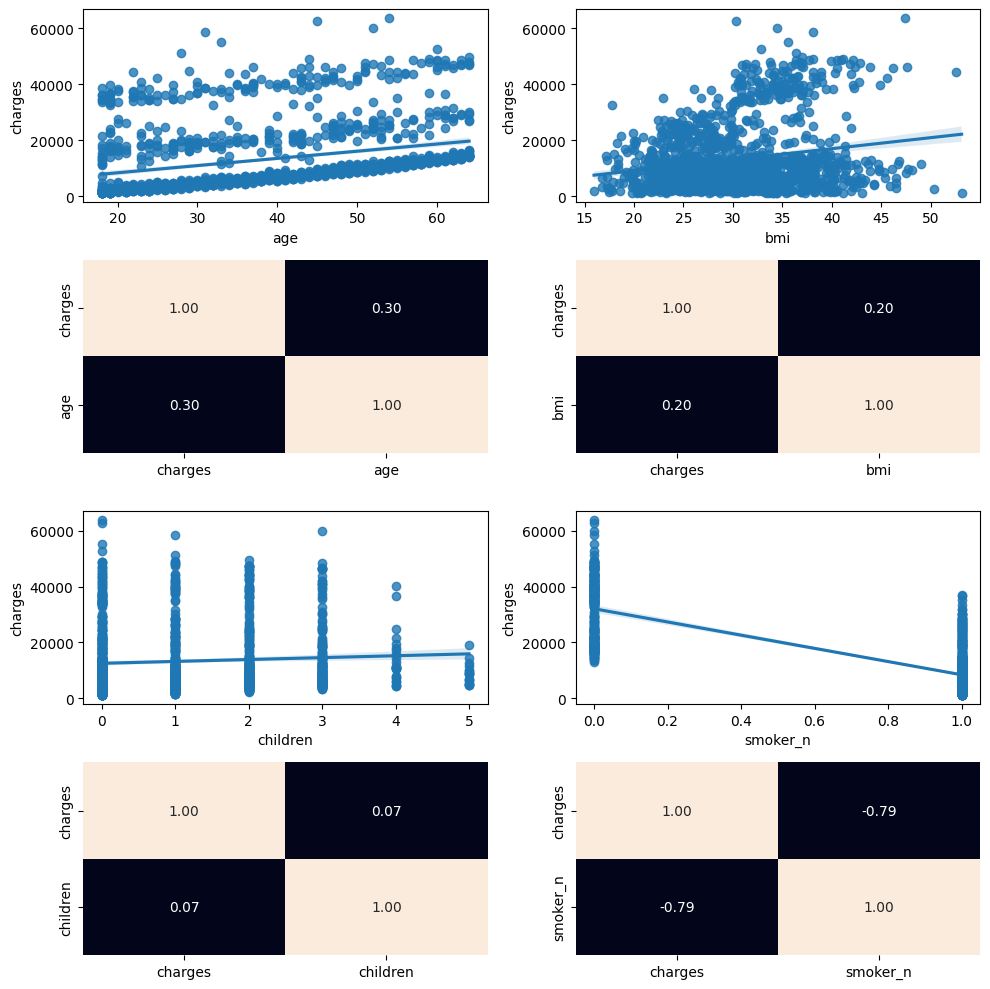

In [41]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10))
total_data_sel = pd.concat([total_data_train_sel, total_data_test_sel]).reset_index(drop = True)

sns.regplot(ax = axis[0, 0], data = total_data_sel, x = "age", y = "charges")
sns.heatmap(total_data_sel[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data_sel, x = "bmi", y = "charges")
sns.heatmap(total_data_sel[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = total_data_sel, x = "children", y = "charges")
sns.heatmap(total_data_sel[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = total_data_sel, x = "smoker_n", y = "charges")
sns.heatmap(total_data_sel[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)


plt.tight_layout()

plt.show()

In [42]:
#Initialization and training of the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercept (a): 13507.13254630927
Coefficients (b1, b2): [   245.57844364    291.58089533    506.4865047  -24284.706241  ]


In [43]:

#Model prediction
y_pred = model.predict(X_test_sel)
y_pred

from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")


Mean squared error: 38007105.16135476
Coefficient of determination: 0.752393507367654


In [44]:
#Reading the total_data_no_outliers_sel dataset
total_data_no_outliers_train_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_train_sel.csv")
total_data_no_outliers_test_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_test_sel.csv")


X_train_no_outliers_sel = total_data_no_outliers_train_sel.drop(["charges"], axis = 1)
X_test_no_outliers_sel = total_data_no_outliers_test_sel.drop(["charges"], axis = 1)

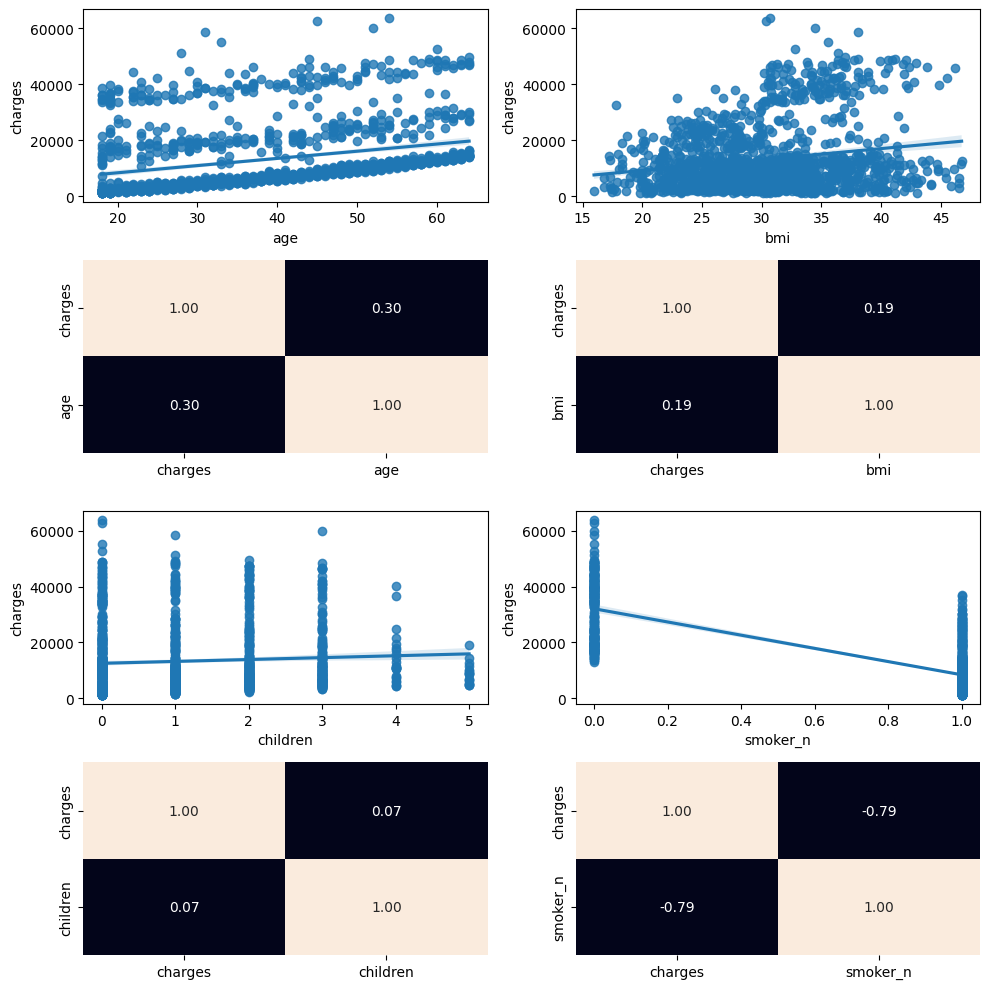

In [45]:

fig, axis = plt.subplots(4, 2, figsize = (10, 10))
total_data_no_outliers_sel = pd.concat([total_data_no_outliers_train_sel, total_data_no_outliers_test_sel]).reset_index(drop = True)

sns.regplot(ax = axis[0, 0], data = total_data_no_outliers_sel, x = "age", y = "charges")
sns.heatmap(total_data_no_outliers_sel[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data_no_outliers_sel, x = "bmi", y = "charges")
sns.heatmap(total_data_no_outliers_sel[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = total_data_no_outliers_sel, x = "children", y = "charges")
sns.heatmap(total_data_no_outliers_sel[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = total_data_no_outliers_sel, x = "smoker_n", y = "charges")
sns.heatmap(total_data_no_outliers_sel[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()

plt.show()

In [46]:


#Initialization and training of the model
model = LinearRegression()
model.fit(X_train_no_outliers_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")




Intercept (a): 13547.972650906011
Coefficients (b1, b2): [   245.78337405    290.77507353    509.22452001 -24305.42349744]


In [47]:
#Model prediction
y_pred = model.predict(X_test_no_outliers_sel)
y_pred

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 38475574.42886693
Coefficient of determination: 0.7493415508520951


In [48]:
#Reading the total_data_norm_sel dataset
total_data_norm_train_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_norm_train_sel.csv")
total_data_norm_test_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_norm_test_sel.csv")


X_train_norm_sel = total_data_norm_train_sel.drop(["charges"], axis = 1)
X_test_norm_sel = total_data_norm_test_sel.drop(["charges"], axis = 1)

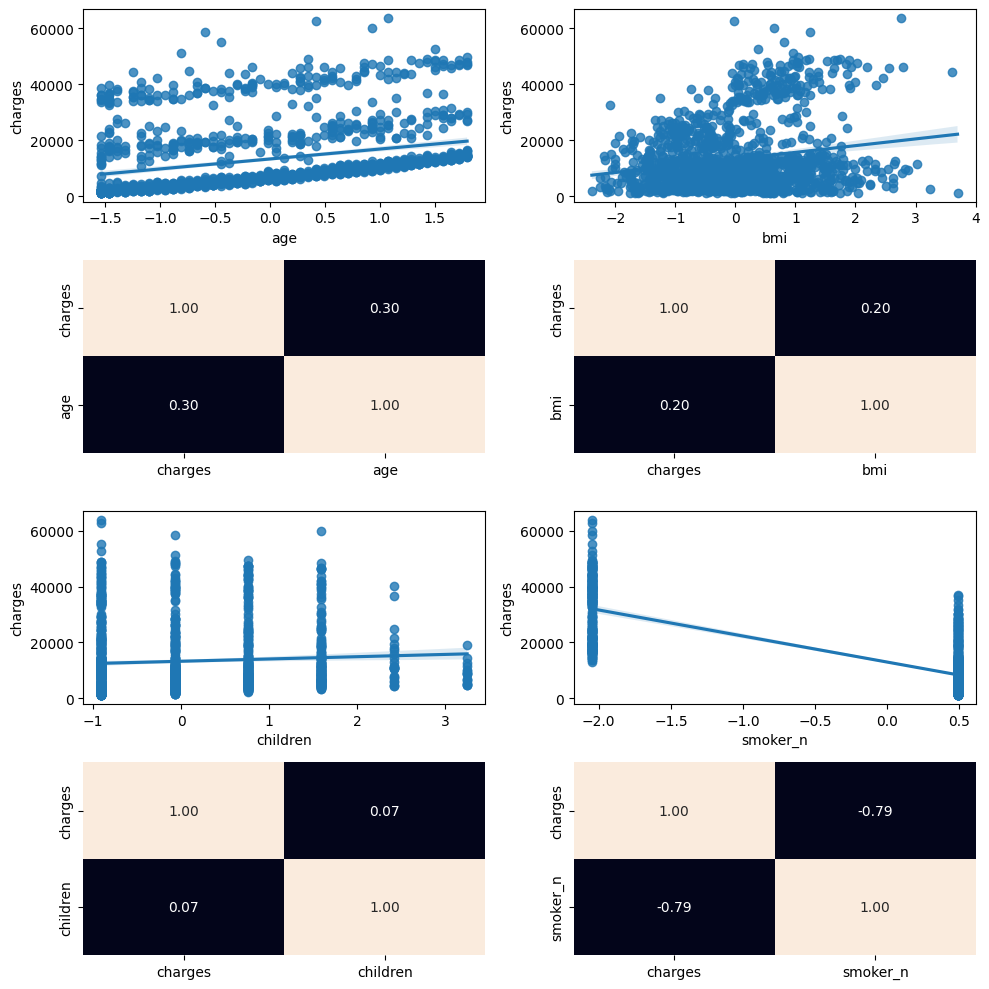

In [49]:

fig, axis = plt.subplots(4, 2, figsize = (10, 10))
total_data_norm_sel = pd.concat([total_data_norm_train_sel, total_data_norm_test_sel]).reset_index(drop = True)

sns.regplot(ax = axis[0, 0], data = total_data_norm_sel, x = "age", y = "charges")
sns.heatmap(total_data_norm_sel[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data_norm_sel, x = "bmi", y = "charges")
sns.heatmap(total_data_norm_sel[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = total_data_norm_sel, x = "children", y = "charges")
sns.heatmap(total_data_norm_sel[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = total_data_norm_sel, x = "smoker_n", y = "charges")
sns.heatmap(total_data_norm_sel[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()

plt.show()

In [50]:
#Initialization and training of the model
model = LinearRegression()
model.fit(X_train_norm_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercept (a): 12983.1257384492
Coefficients (b1, b2): [ 3389.24690315  1779.81987173   609.14858522 -9574.82779636]


In [51]:

#Model prediction
y_pred = model.predict(X_test_norm_sel)
y_pred

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 38007105.161354765
Coefficient of determination: 0.752393507367654


In [52]:
#Reading the total_data_no_outliers_norm
total_data_no_outliers_norm_train_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_norm_train_sel.csv")
total_data_no_outliers_norm_test_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_norm_test_sel.csv")

X_train_no_outliers_norm_sel = total_data_no_outliers_norm_train_sel.drop(["charges"], axis = 1)
X_test_no_outliers_norm_sel = total_data_no_outliers_norm_test_sel.drop(["charges"], axis = 1)



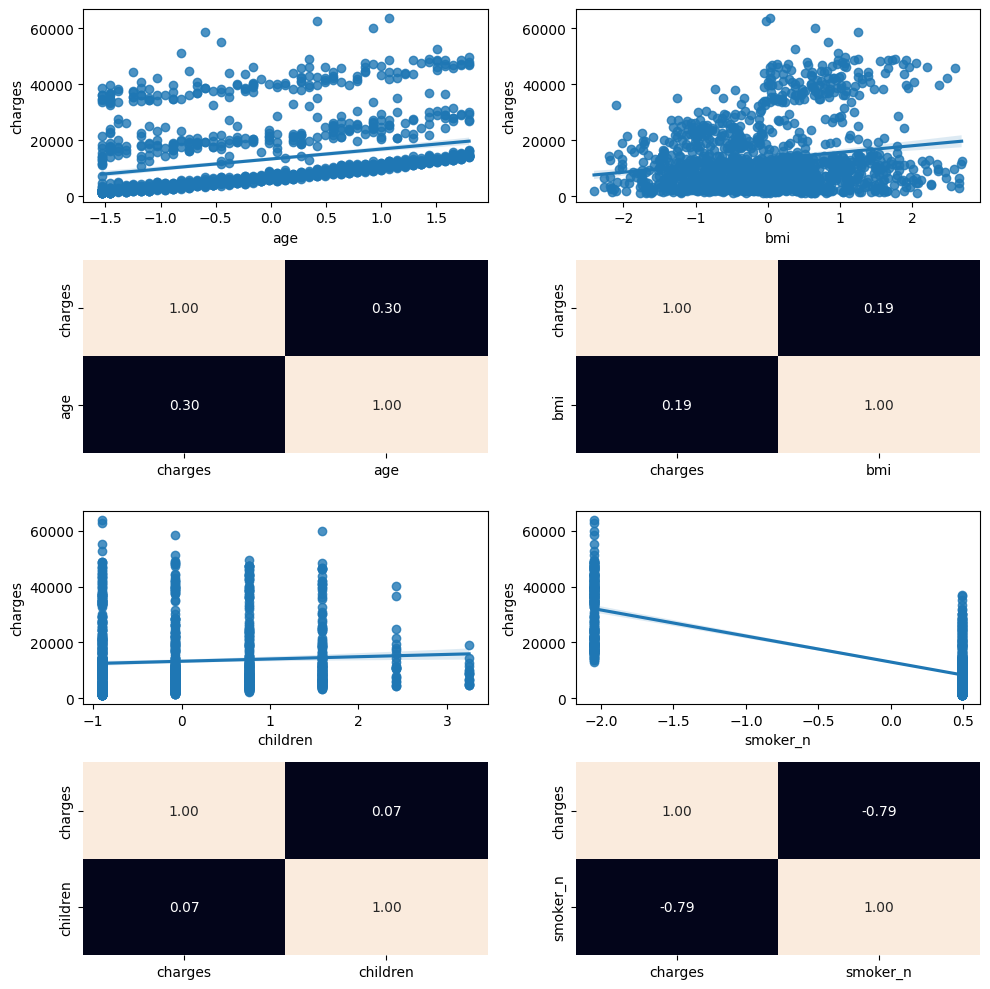

In [53]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10))
total_data_no_outliers_norm_sel = pd.concat([total_data_no_outliers_norm_train_sel, total_data_no_outliers_norm_test_sel]).reset_index(drop = True)

sns.regplot(ax = axis[0, 0], data = total_data_no_outliers_norm_sel, x = "age", y = "charges")
sns.heatmap(total_data_no_outliers_norm_sel[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data_no_outliers_norm_sel, x = "bmi", y = "charges")
sns.heatmap(total_data_no_outliers_norm_sel[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = total_data_no_outliers_norm_sel, x = "children", y = "charges")
sns.heatmap(total_data_no_outliers_norm_sel[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = total_data_no_outliers_norm_sel, x = "smoker_n", y = "charges")
sns.heatmap(total_data_no_outliers_norm_sel[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()

plt.show()

In [54]:


#Initialization and training of the model
model = LinearRegression()
model.fit(X_train_no_outliers_norm_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")



Intercept (a): 12983.1257384492
Coefficients (b1, b2): [ 3392.07516342  1760.06817996   612.44158145 -9582.99607153]


In [55]:
#Model prediction
y_pred = model.predict(X_test_no_outliers_norm_sel)
y_pred

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 38475574.42886693
Coefficient of determination: 0.7493415508520951


In [56]:
#Reading the total_data_norm_sel dataset
total_data_scal_train_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_scal_train_sel.csv")
total_data_scal_test_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_scal_test_sel.csv")


X_train_scal_sel = total_data_scal_train_sel.drop(["charges"], axis = 1)
X_test_scal_sel = total_data_scal_test_sel.drop(["charges"], axis = 1)

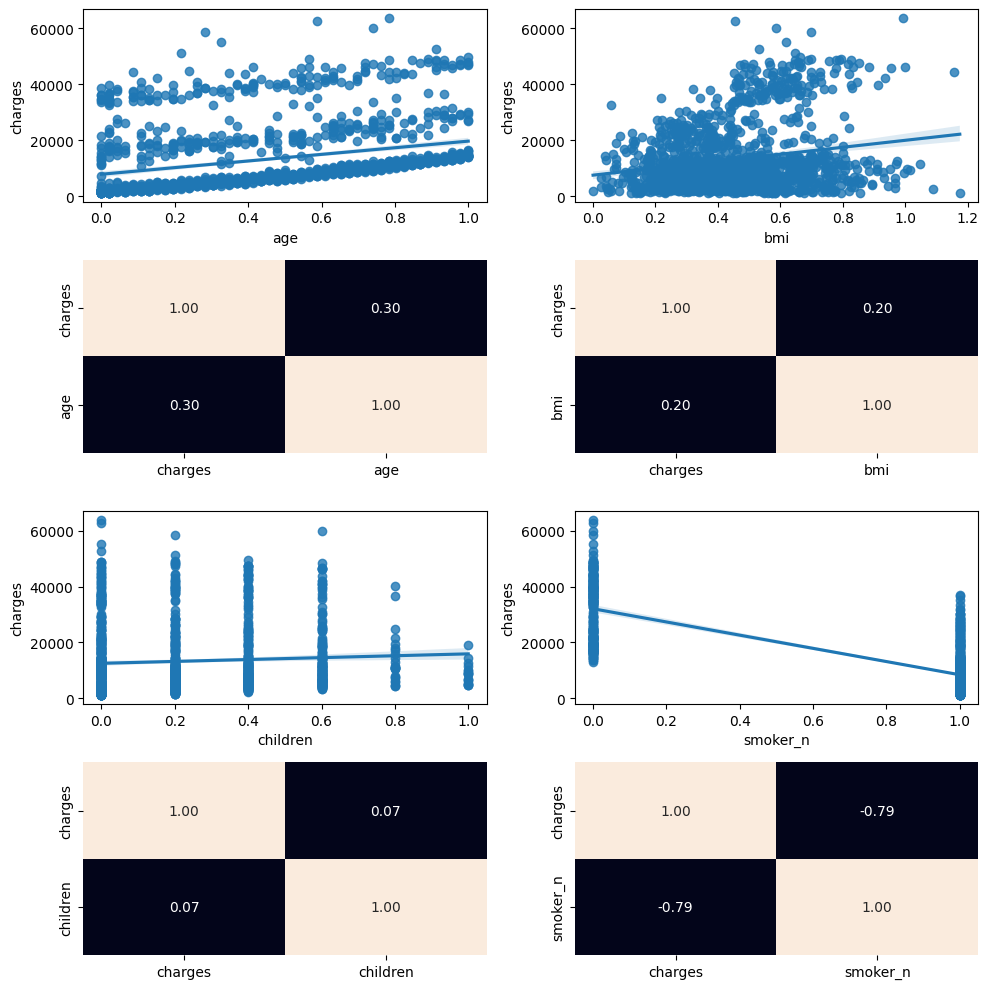

In [57]:

fig, axis = plt.subplots(4, 2, figsize = (10, 10))
total_data_scal_sel = pd.concat([total_data_scal_train_sel, total_data_scal_test_sel]).reset_index(drop = True)

sns.regplot(ax = axis[0, 0], data = total_data_scal_sel, x = "age", y = "charges")
sns.heatmap(total_data_scal_sel[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data_scal_sel, x = "bmi", y = "charges")
sns.heatmap(total_data_scal_sel[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = total_data_scal_sel, x = "children", y = "charges")
sns.heatmap(total_data_scal_sel[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = total_data_scal_sel, x = "smoker_n", y = "charges")
sns.heatmap(total_data_scal_sel[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()

plt.show()

In [58]:
#Initialization and training of the model
model = LinearRegression()
model.fit(X_train_scal_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")


Intercept (a): 22581.17562134584
Coefficients (b1, b2): [ 11296.60840767   9225.61952816   2532.43252351 -24284.706241  ]


In [59]:

#Model prediction
y_pred = model.predict(X_test_scal_sel)
y_pred

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 38007105.161354765
Coefficient of determination: 0.752393507367654


In [60]:
#Reading the total_data_no_outliers_scal dataset
total_data_no_outliers_scal_train_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_scal_train_sel.csv")
total_data_no_outliers_scal_test_sel = pd.read_csv("/workspaces/machine-learning-linear-regression2/data/processed/total_data_no_outliers_scal_test_sel.csv")


X_train_no_outliers_scal_sel = total_data_no_outliers_scal_train_sel.drop(["charges"], axis = 1)
X_test_no_outliers_scal_sel = total_data_no_outliers_scal_test_sel.drop(["charges"], axis = 1)



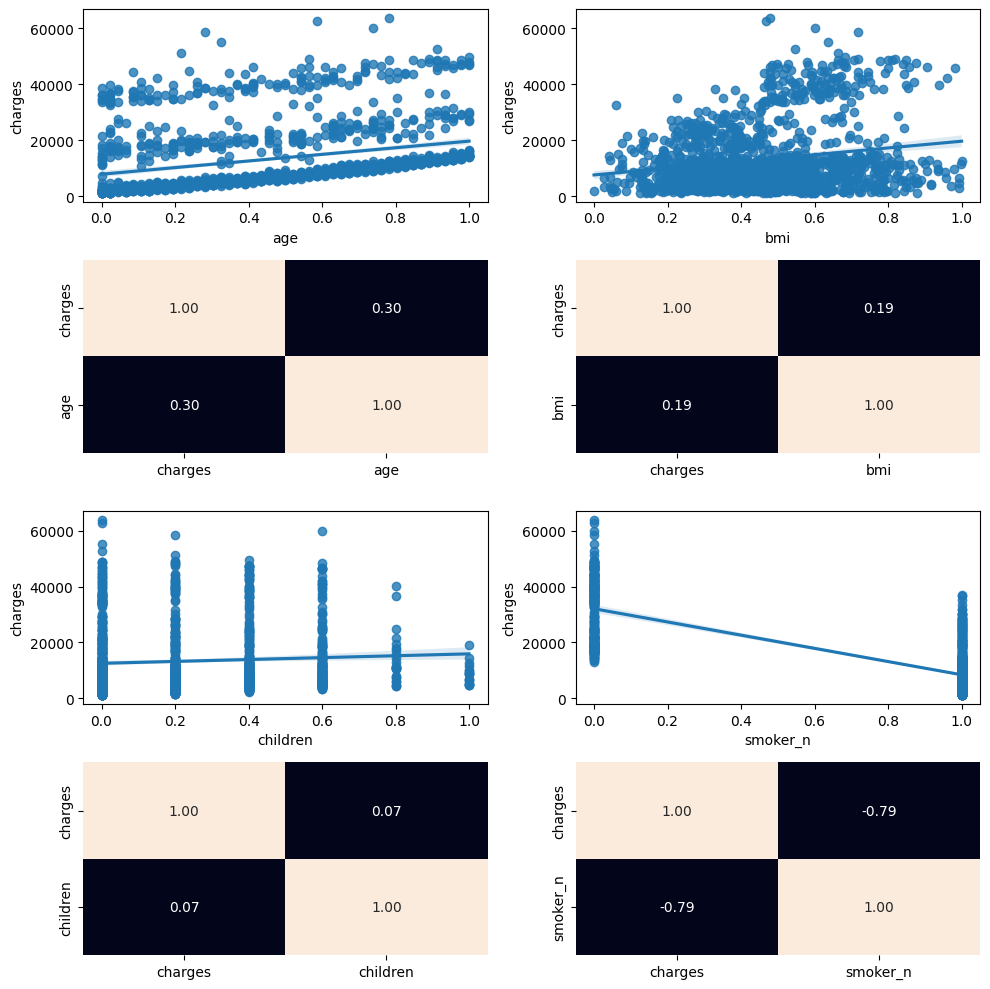

In [61]:

fig, axis = plt.subplots(4, 2, figsize = (10, 10))
total_data_no_outliers_scal_sel = pd.concat([total_data_no_outliers_scal_train_sel, total_data_no_outliers_scal_test_sel]).reset_index(drop = True)

sns.regplot(ax = axis[0, 0], data = total_data_no_outliers_scal_sel, x = "age", y = "charges")
sns.heatmap(total_data_no_outliers_scal_sel[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data_no_outliers_scal_sel, x = "bmi", y = "charges")
sns.heatmap(total_data_no_outliers_scal_sel[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = total_data_no_outliers_scal_sel, x = "children", y = "charges")
sns.heatmap(total_data_no_outliers_scal_sel[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = total_data_no_outliers_scal_sel, x = "smoker_n", y = "charges")
sns.heatmap(total_data_no_outliers_scal_sel[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()

plt.show()

In [62]:
#Initialization and training of the model
model = LinearRegression()
model.fit(X_train_no_outliers_scal_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercept (a): 22612.843557387896
Coefficients (b1, b2): [ 11306.03520649   8952.96451393   2546.12260005 -24305.42349744]


In [63]:

#Model prediction
y_pred = model.predict(X_test_no_outliers_scal_sel)
y_pred

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 38475574.428866945
Coefficient of determination: 0.749341550852095



The datasets that got the best results (not very good ones, though) are total_data_sel, total_data_norm_sel and total_data_scal_sel. The Linear Regression model does not have hyperparameters to optimize.
